<h1 style="color: #FF8C00;">Portfolio Analyst. Prueba Python.</h1>

---

La siguiente prueba consistirá en hacer una serie de cálculos y gráficos para analizar un conjunto de activos financieros.

Para ello deberás desarrollar el código necesario que permita realizar cada una de las tareas.


<h2 style="color: #FF6347;">Import de librerías a usar</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

<h1 style="color: #FF8C00;">Ejercicio 1. Carga de datos y gráfico de precios.</h1>

En este primer ejercicio debes cargar el fichero que contiene los precios de los activos financieros a analizar. Este fichero se llama `financial_assets_prices.csv`.

Una vez cargados los precios de los activos, debes pintarlos en un gráfico temporal. Ten en cuenta que para que puedan ser comparados deben comenzar todas las series en el mismo valor.

<h2 style="color: #FF6347;">Carga de datos</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [77]:
data = pd.read_csv("financial_assets_prices.csv")
df = data.copy()

In [78]:
df.isna().sum()

date       0
Asset1    13
Asset2    13
Asset3    13
Asset4    49
Asset5    20
dtype: int64

In [79]:
df = df.ffill()
df

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13
...,...,...,...,...,...,...
778,2021-12-27,249.9207,103.956,38.820000,342.40,70.11
779,2021-12-28,249.9368,104.526,39.115000,342.40,70.03
780,2021-12-29,248.7215,104.360,38.855000,342.46,69.81
781,2021-12-30,248.5485,104.663,38.985000,342.55,69.91


In [80]:
df.isna().sum()

date      0
Asset1    0
Asset2    0
Asset3    0
Asset4    0
Asset5    0
dtype: int64

In [81]:
df["date"] = pd.to_datetime(df["date"])

In [82]:
#df.set_index("date", inplace=True)

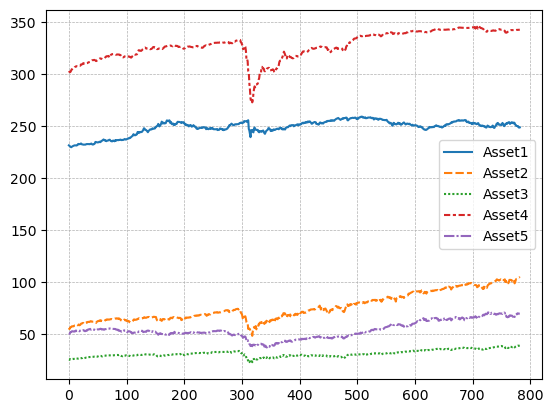

In [187]:
sns.lineplot(data=df)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

In [125]:
melted_df = df.melt(id_vars=['date'], var_name='asset')
melted_df

,date,asset,value
0,2019-01-02,Asset1,231.5061
1,2019-01-03,Asset1,231.0356
2,2019-01-04,Asset1,230.4026
3,2019-01-07,Asset1,230.0543
4,2019-01-08,Asset1,229.7012
...,...,...,...
3910,2021-12-27,Asset5,70.1100
3911,2021-12-28,Asset5,70.0300
3912,2021-12-29,Asset5,69.8100
3913,2021-12-30,Asset5,69.9100


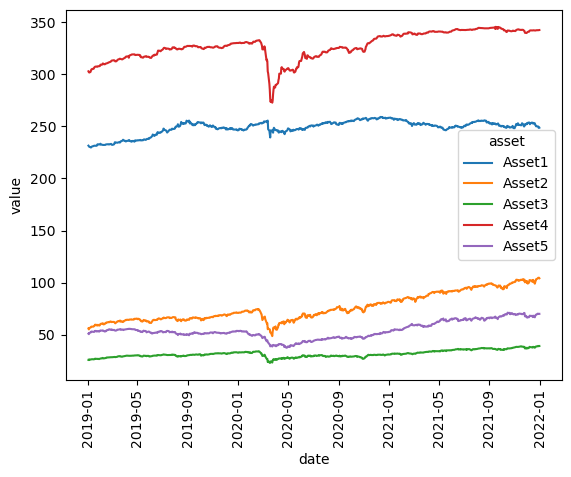

In [127]:
sns.lineplot(data=melted_df, x='date', y='value', hue="asset")
plt.xticks(rotation = 90)
plt.show()

<h1 style="color: #FF8C00;">Ejercicio 2. Rendimientos diarios porcentuales.</h1>

En este segundo ejercicio debes calcular los rendimientos diarios porcentuales de cada uno de los activos y obtener la siguiente información de ellos:
- Calcular la matriz de correlaciones entre los 5 activos.
- Realizar un gráfico de dispersión entre los rendimientos de 2 activos.

<h2 style="color: #FF6347;">Cálculo de rendimientos diarios.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [319]:
df2 = df.set_index("date").pct_change()*100
df2

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.203234,-1.607159,-0.569902,-0.270690,-0.943211
2019-01-04,-0.273984,2.095422,2.525524,-0.112542,1.924221
2019-01-07,-0.151170,1.263162,-0.733753,0.185572,1.479175
2019-01-08,-0.153486,0.100285,0.703977,0.360533,-0.019179
...,...,...,...,...,...
2021-12-27,-0.091306,0.738415,0.543901,0.000000,1.344319
2021-12-28,0.006442,0.548309,0.759918,0.000000,-0.114106
2021-12-29,-0.486243,-0.158812,-0.664707,0.017523,-0.314151


In [176]:
"""
df2 = df.copy()
df2['Pct_Change_Asset1'] = round(df2.Asset1.pct_change()*100, 2)
df2['Pct_Change_Asset2'] = round(df2.Asset2.pct_change()*100, 2)
df2['Pct_Change_Asset3'] = round(df2.Asset3.pct_change()*100, 2)
df2['Pct_Change_Asset4'] = round(df2.Asset4.pct_change()*100, 2)
df2['Pct_Change_Asset5'] = round(df2.Asset5.pct_change()*100, 2)
df2
"""

"\ndf2 = df.copy()\ndf2['Pct_Change_Asset1'] = round(df2.Asset1.pct_change()*100, 2)\ndf2['Pct_Change_Asset2'] = round(df2.Asset2.pct_change()*100, 2)\ndf2['Pct_Change_Asset3'] = round(df2.Asset3.pct_change()*100, 2)\ndf2['Pct_Change_Asset4'] = round(df2.Asset4.pct_change()*100, 2)\ndf2['Pct_Change_Asset5'] = round(df2.Asset5.pct_change()*100, 2)\ndf2\n"

<h2 style="color: #FF6347;">Cálculo de la matriz de correlaciones.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [322]:
df3 = data.copy()
df3.drop(columns="date", inplace=True)
correlation_matrix = df3.corr()

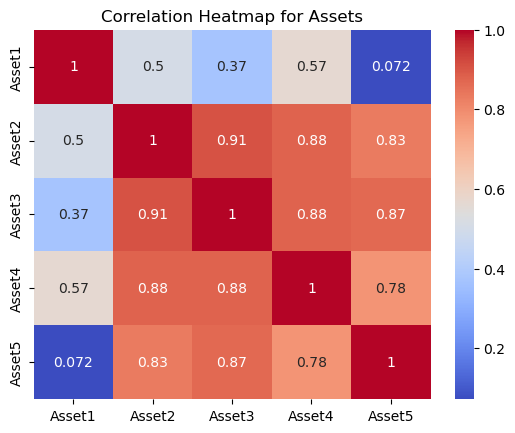

In [323]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Assets")
plt.show()

<h2 style="color: #FF6347;">Gráfico de dispersión entre los rendimientos de 2 activos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

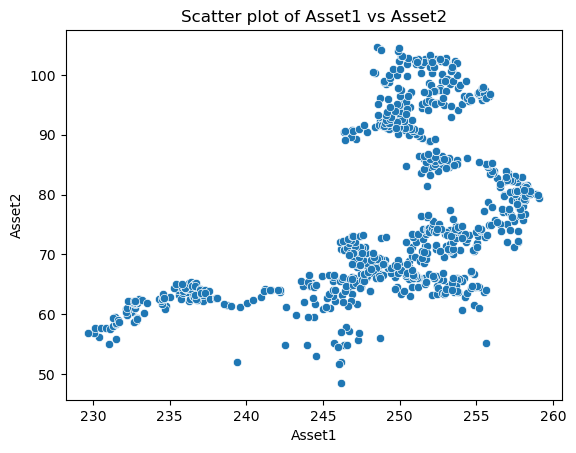

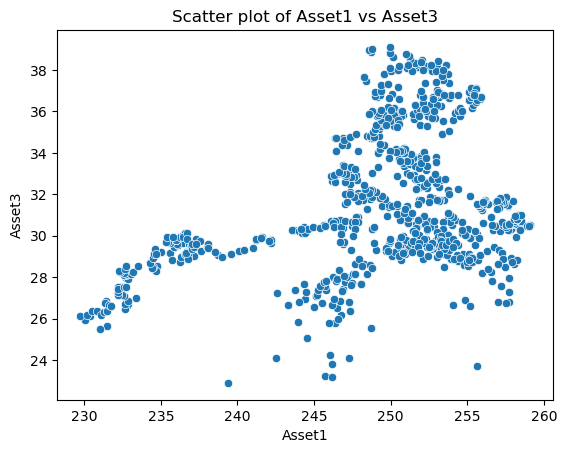

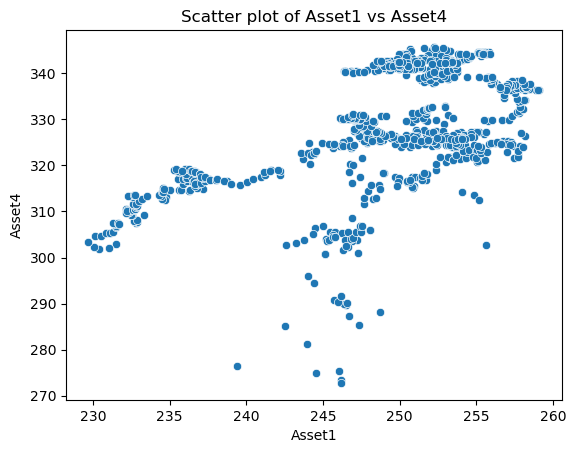

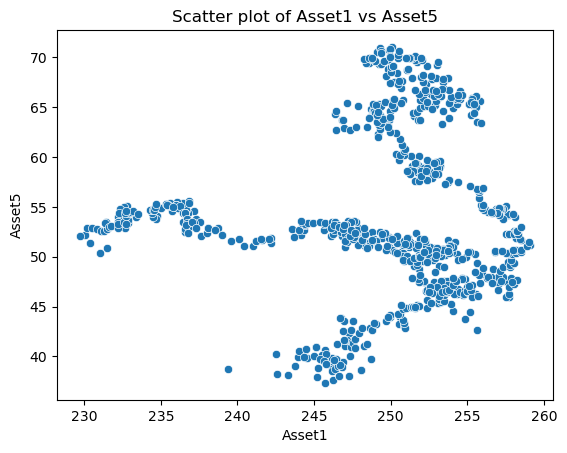

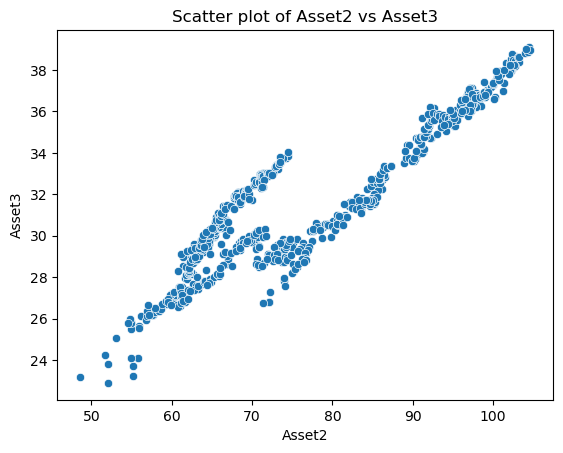

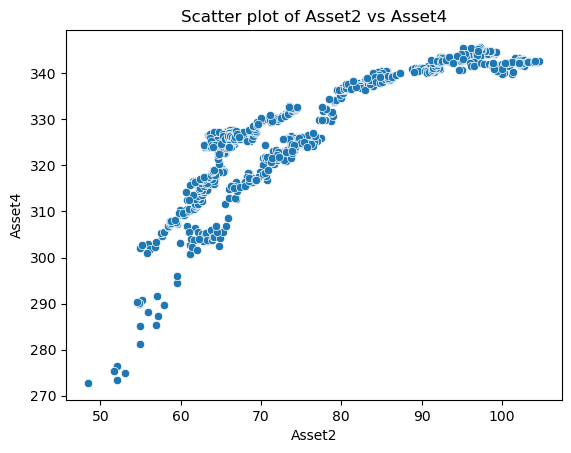

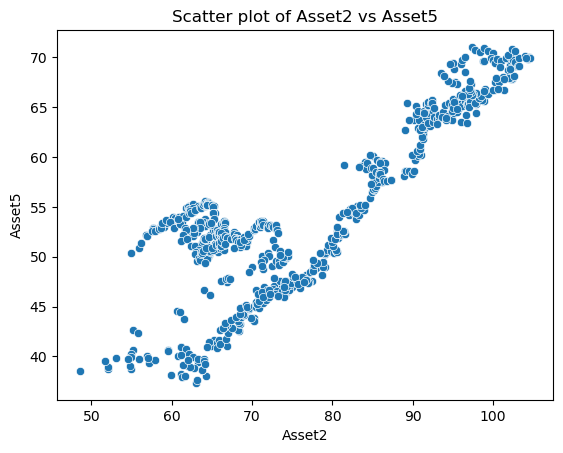

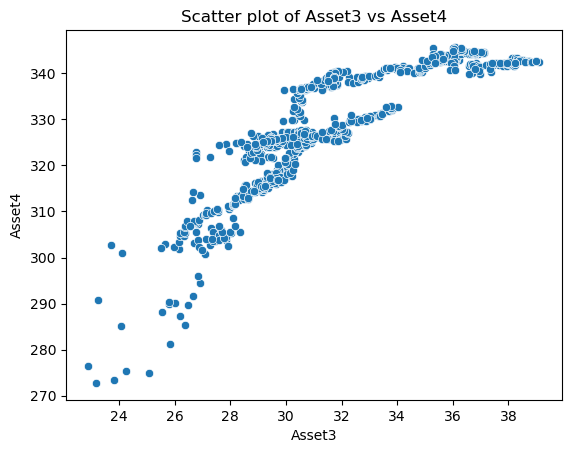

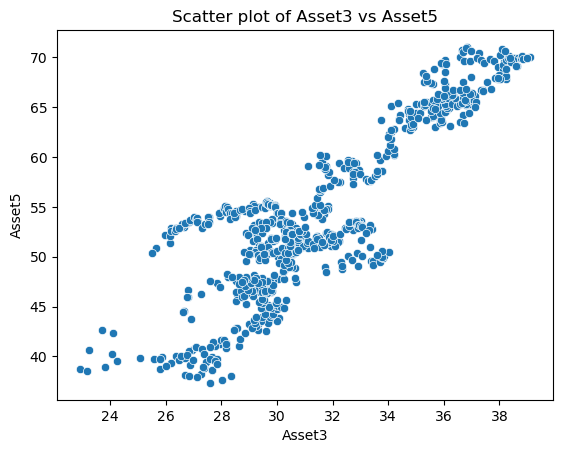

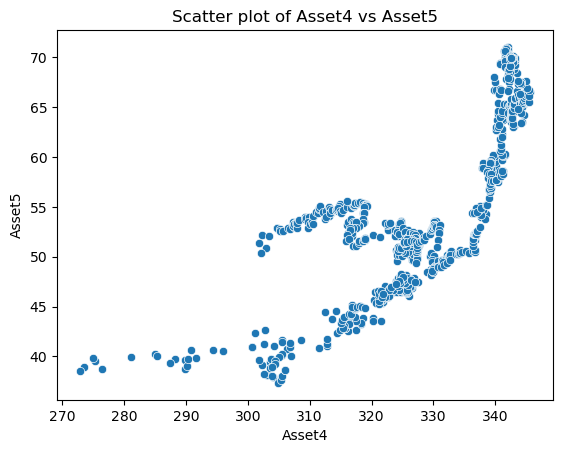

In [76]:
for i in range(len(df3.columns)):
    for j in range(len(df3.columns)):
        if (i < j):
            plt.title(f"Scatter plot of {df3.columns[i]} vs {df3.columns[j]}")
            sns.scatterplot(data=df3, x=df3.columns[i], y=df3.columns[j])
            plt.show()

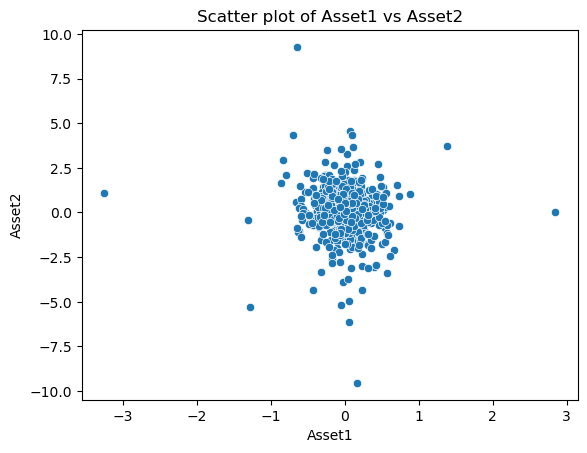

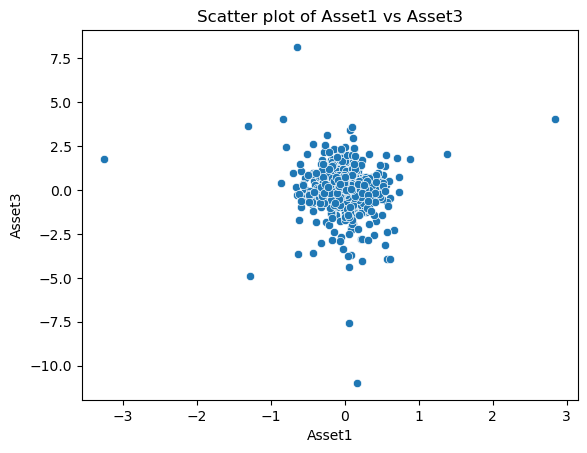

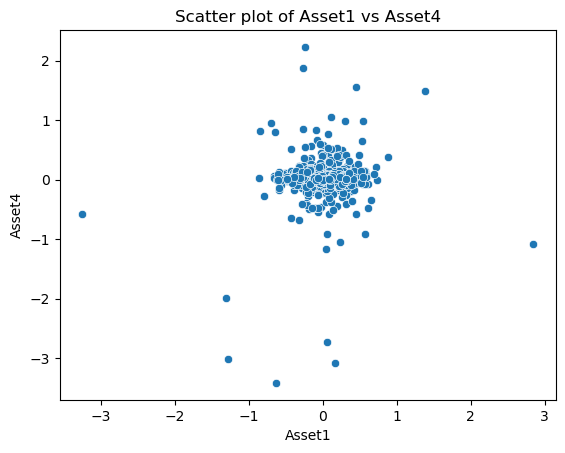

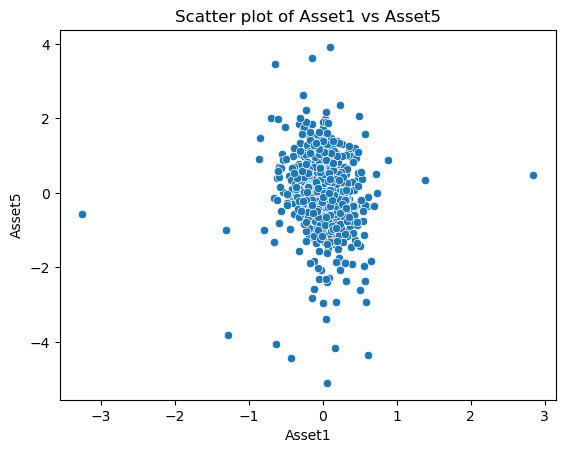

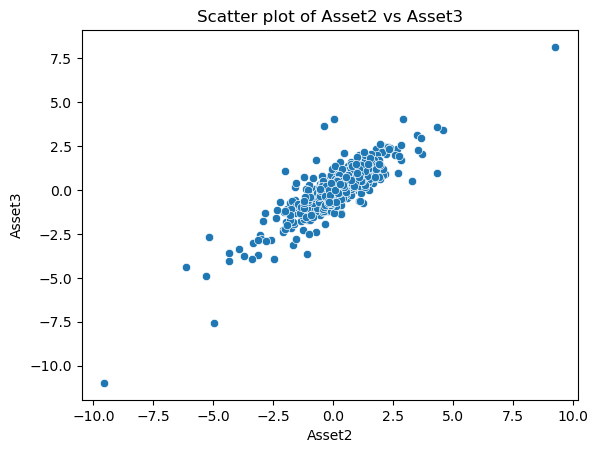

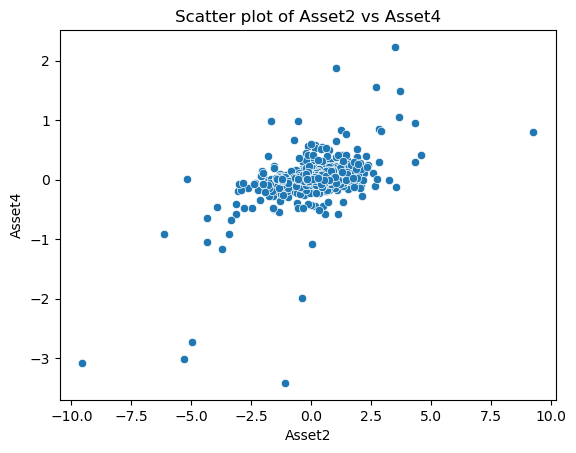

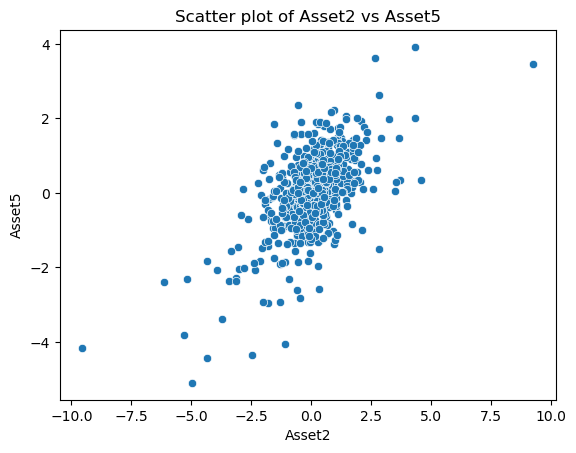

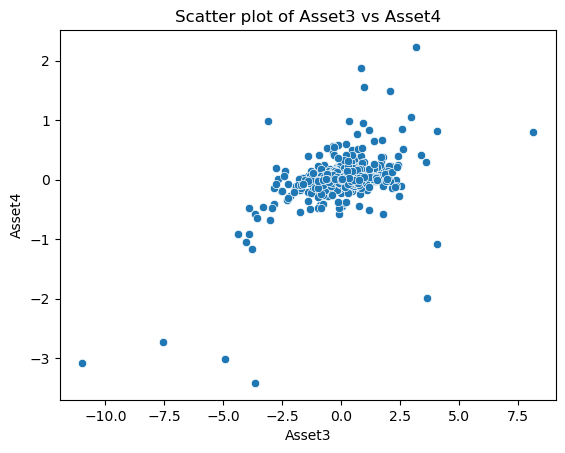

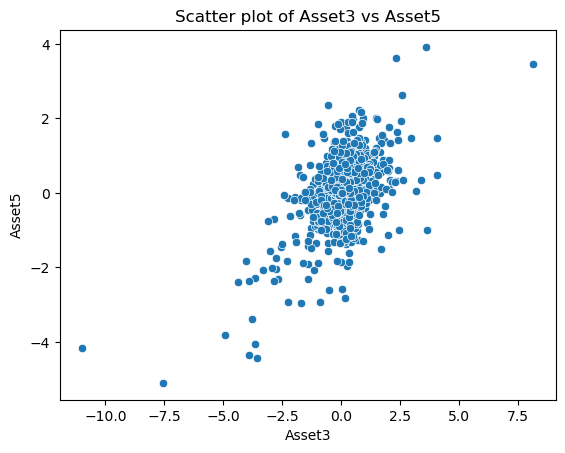

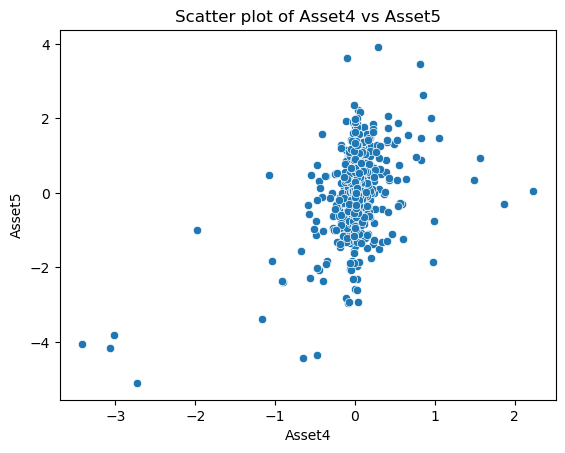

In [321]:
for i in range(len(df2.columns)):
    for j in range(len(df2.columns)):
        if (i < j):
            plt.title(f"Scatter plot of {df2.columns[i]} vs {df2.columns[j]}")
            sns.scatterplot(data=df2, x=df2.columns[i], y=df2.columns[j])
            plt.show()

<h1 style="color: #FF8C00;">Ejercicio 3. Análisis de una cartera</h1>

Este tercer ejercicio consiste en calcular y analizar los resultados de una cartera. Para ello será necesario cargar el fichero con los pesos que tiene cada uno de los activos en cada uno de los días. Este fichero se llama `portfolio_weights.csv`.

Para completar el ejercicio, será necesario calcular:
- Gráfico de área de los pesos.
- Gráfico de la rentabilidad histórica acumulada de la cartera.
- Rentabilidad anualizada de la cartera.
- Volatilidad anualizada de la cartera. (Puedes usar el factor de anualización de 261 días)

Extra: Gráfico de área de los pesos de los activos agrupándolos por familia. Esta información está contenida en el fichero `financial_assets_information.csv`.

<h2 style="color: #FF6347;">Gráfico de área de los pesos.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [290]:
weights_df = pd.read_csv("portfolio_weights.csv")
weights_df = weights_df.set_index("date")

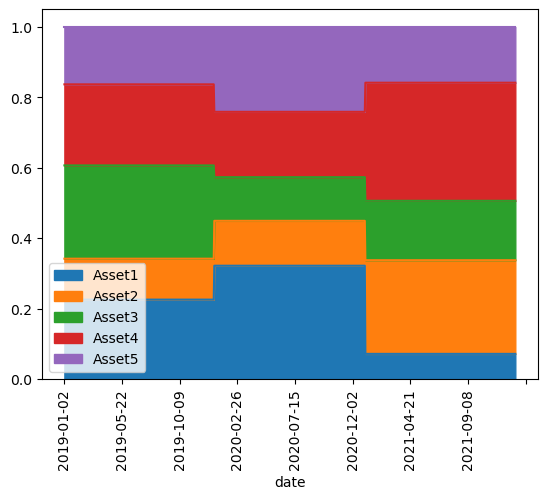

In [252]:
weights_df.plot.area()
plt.xticks(rotation = 90)
plt.show()

<h2 style="color: #FF6347;">Gráfico de la rentabilidad histórica acumulada de la cartera.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [431]:
df4 = weights_df * df.set_index("date").values
df4 = df4.diff().cumsum()
df4

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.106078,-0.104397,-0.038737,-0.188854,-0.078228
2019-01-04,-0.248793,0.029529,0.131948,-0.267159,0.079857
2019-01-07,-0.327320,0.111953,0.081106,-0.138186,0.203718
2019-01-08,-0.406929,0.118580,0.129527,0.112852,0.202088
...,...,...,...,...,...
2021-12-27,-34.373777,21.166201,-0.245282,45.097139,2.808536
2021-12-28,-34.372629,21.317873,-0.195494,45.097139,2.795868
2021-12-29,-34.459288,21.273702,-0.239375,45.117267,2.761030


In [360]:
df4.sum(axis=1)

date
2019-01-02     0.000000
2019-01-03    -0.516293
2019-01-04    -0.274618
2019-01-07    -0.068729
2019-01-08     0.156118
                ...    
2021-12-27    34.452817
2021-12-28    34.642758
2021-12-29    34.453335
2021-12-30    34.589594
2021-12-31    34.472864
Length: 783, dtype: float64

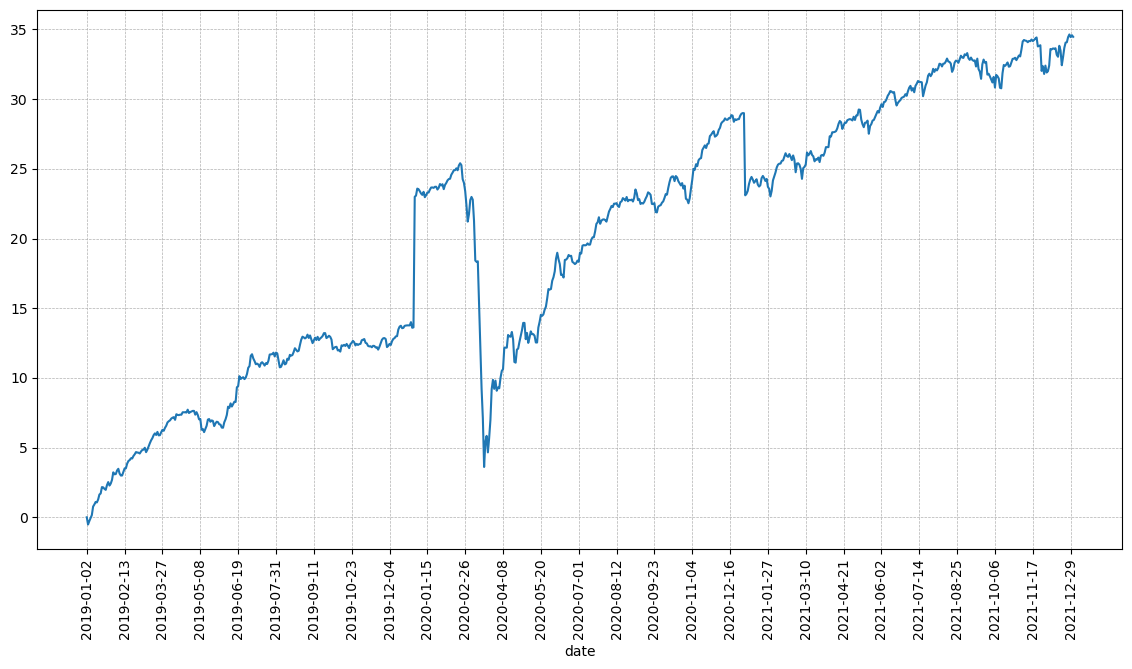

In [377]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df4.sum(axis=1))
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(rotation = 90)
plt.xticks(np.arange(0, len(df4), 30))
plt.show()

<h2 style="color: #FF6347;">Rentabilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [450]:
df5 = weights_df * df.set_index("date").values
df5 = df5.sum(axis=1)
df5

date
2019-01-02    143.549208
2019-01-03    143.032914
2019-01-04    143.274590
2019-01-07    143.480479
2019-01-08    143.705325
                 ...    
2021-12-27    178.002024
2021-12-28    178.191965
2021-12-29    178.002543
2021-12-30    178.138801
2021-12-31    178.022071
Length: 783, dtype: float64

In [457]:
tot_ren = (df5.iloc[-1]/ df5.iloc[0])
tot_ren = tot_ren ** (1/3) - 1
tot_ren*100


7.437942656402696

In [ ]:
df5.iloc[0] * (1+tot_ren) * (1+tot_ren) * (1+tot_ren)

178.02207126732597

<h2 style="color: #FF6347;">Volatilidad anualizada.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [489]:
daily_vol = df2.sum(axis=1).std()
daily_vol

3.126073177549778

In [490]:
yearly_vol = daily_vol * np.sqrt(len(df4)/3)
yearly_vol

50.50325778080458

<h2 style="color: #FF6347;">Extra. Gráfico de área de los pesos de los activos agrupándolos por familia.</h2>
<h3 style="color: #FF6347;">-- Inserta aquí tu código --</h2>

In [135]:
information_df = pd.read_csv("financial_assets_information.csv")
information_df

,Name,Family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


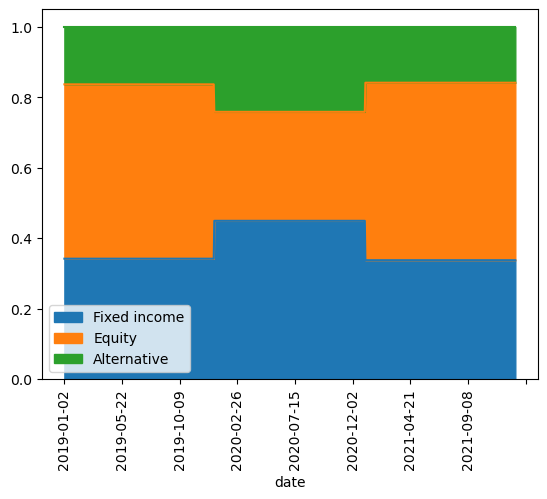

In [155]:
# AGREGACION MANUAL
weights2_df = weights_df.copy()
weights2_df["Fixed income"] = weights2_df["Asset1"] + weights2_df["Asset2"]
weights2_df["Equity"] = weights2_df["Asset3"] + weights2_df["Asset4"]
weights2_df["Alternative"] = weights2_df["Asset5"]
weights2_df.drop(columns=["Asset1", "Asset2", "Asset3", "Asset4", "Asset5"], inplace=True)
weights2_df.plot.area(x="date")
plt.xticks(rotation = 90)
plt.show()

In [147]:
information_df.rename(columns={"Name": "asset", "Family": "family"}, inplace=True)
information_df

,asset,family
0,Asset1,Fixed Income
1,Asset2,Fixed Income
2,Asset3,Equity
3,Asset4,Equity
4,Asset5,Alternative


In [145]:
# AGREGACION CON FORMULAS
melted_weights_df = weights_df.melt(id_vars=['date'], var_name='asset')
melted_weights_df

,date,asset,value
0,2019-01-02,Asset1,0.225458
1,2019-01-03,Asset1,0.225458
2,2019-01-04,Asset1,0.225458
3,2019-01-07,Asset1,0.225458
4,2019-01-08,Asset1,0.225458
...,...,...,...
3910,2021-12-27,Asset5,0.158356
3911,2021-12-28,Asset5,0.158356
3912,2021-12-29,Asset5,0.158356
3913,2021-12-30,Asset5,0.158356


In [154]:
melt_merge_weights_df = melted_weights_df.merge(information_df, on="asset", how="left")
melt_merge_weights_df

,date,asset,value,family
0,2019-01-02,Asset1,0.225458,Fixed Income
1,2019-01-03,Asset1,0.225458,Fixed Income
2,2019-01-04,Asset1,0.225458,Fixed Income
3,2019-01-07,Asset1,0.225458,Fixed Income
4,2019-01-08,Asset1,0.225458,Fixed Income
...,...,...,...,...
3910,2021-12-27,Asset5,0.158356,Alternative
3911,2021-12-28,Asset5,0.158356,Alternative
3912,2021-12-29,Asset5,0.158356,Alternative
3913,2021-12-30,Asset5,0.158356,Alternative


In [159]:
grouped_weights = melt_merge_weights_df.groupby(['date', 'family'])['value'].sum().unstack()
grouped_weights

family,Alternative,Equity,Fixed Income
date,,,
2019-01-02,0.162974,0.495313,0.341713
2019-01-03,0.162974,0.495313,0.341713
2019-01-04,0.162974,0.495313,0.341713
2019-01-07,0.162974,0.495313,0.341713
2019-01-08,0.162974,0.495313,0.341713
...,...,...,...
2021-12-27,0.158356,0.504245,0.337400
2021-12-28,0.158356,0.504245,0.337400
2021-12-29,0.158356,0.504245,0.337400


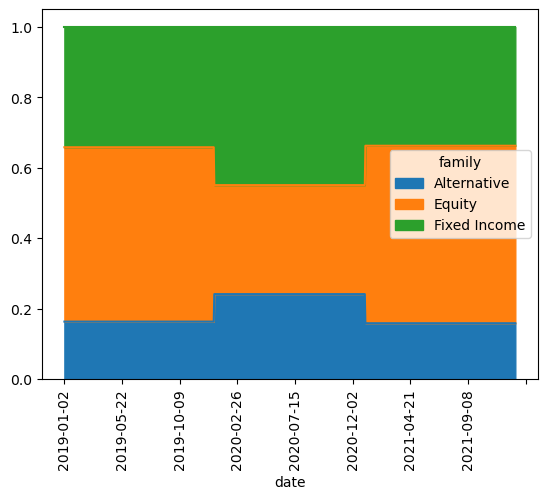

In [160]:
grouped_weights.plot.area()
plt.xticks(rotation = 90)
plt.show()